# 서론
------

소셜 네트워크(사회망)은 데이터 과학의 한 부분입니다. 소셜 네트워크를 잘 분석하는 것으로 우리는 사회의 어떠한 부분이 중요한 역할을 하는지 또는 어떤 중요한 역할을 하는 지 알아낼 수 있습니다. 그렇게 하기 위해서는 네트워크를 구성하고 있는 특징에 대해서 잘 이해하고 있어야 합니다. 따라서 본 과제에서는 두 가지 서브 과제를 수행하였습니다. 첫번째는 다양한 네트워크를 만들어내고 각 네트워크들의 특징을 추출한 다음 분석해보는 것입니다. 두번째 서브 과제는 트위터에서 수집한 data로 네트워크를 만들어 수업시간에서 배운 다양한 개념들을 대입해 보는 것입니다. 두 과제에서 알아본 그래프의 특징들은 다음과 같습니다.
-	총 노드의 수, 총 간선의 수
-	Clustering coefficient, Average clustering coefficient
-	Radius, Diameter, Center, Periphery
-	Degree/Closeness/Betweenness/Eigenvector Centrality
-	Weakly/Strongly connected components


# 본론
-------

1. Graph Generators를 사용한 그래프 특성 분석
-------

In [2]:
import networkx as nx
import networkx.algorithms as algo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def graph_features(G):
    print "radius:", algo.radius(G)
    print "diameter:", algo.diameter(G)
    print "center:", algo.center(G)
    print "periphery:", algo.periphery(G)

    coef = nx.clustering(G)
    df = pd.DataFrame(coef.values(), index=coef.keys(), columns=['coef'])

    print "clustering coefficients:"
    print df

    print "average clustering coefficients:", nx.average_clustering(G)

- Classic graph
---------

- Balanced r-tree of height h

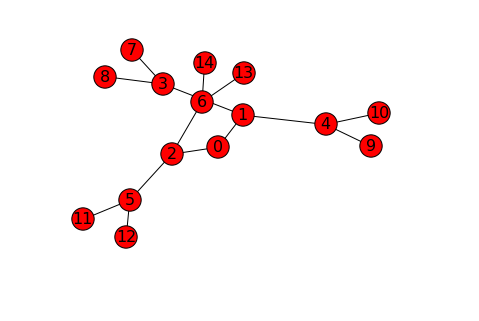

radius: 3
diameter: 6
center: [0]
periphery: [7, 8, 9, 10, 11, 12, 13, 14]
clustering coefficients:
    coef
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
average clustering coefficients: 0.0


In [4]:
balanced=nx.balanced_tree(2,3)
nx.draw(balanced, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(balanced)

[분석]: balanced_tree(r, h, create_using=None)  
Balanced tree 그래프는 루트 노드 (노드 0)은 r(현재 그래프에서 2)의 degree를 갖고, 파생되는 노드들은 r+1의 degree를 갖습니다. 루트 노드에서 마지막으로 파생되는 노드까지의 거리는 h(현재 그래프에서 3) 입니다.  
가장 짧은 최대 거리(radius)는 3이고 루트 노드(노드 0)에서 다른 노드까지의 최대 거리를 의미합니다.  
가장 긴 최대 거리(diameter)는 6이고 7에서 14번째까지의 노드들(tree의 끝에 있는 노드들)이 갖는 최대 거리를 의미합니다.  
Balanced tree 그래프는 한 노드에서 다른 노드로 파생되어지므로 노드의 이웃 노드끼리 연결되지 않습니다. 따라서 clustering coefficient는 모두 0입니다.

- Barbell_graph

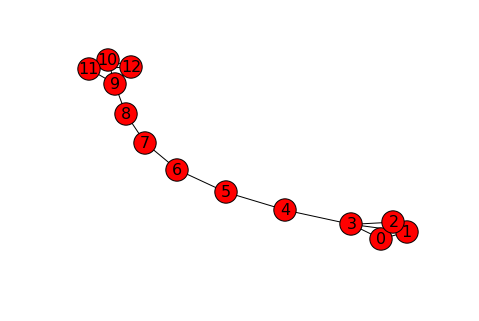

radius: 4
diameter: 8
center: [6]
periphery: [0, 1, 2, 10, 11, 12]
clustering coefficients:
    coef
0    1.0
1    1.0
2    1.0
3    0.5
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.5
10   1.0
11   1.0
12   1.0
average clustering coefficients: 0.538461538462


In [5]:
barbell=nx.barbell_graph(4,5)
nx.draw(barbell, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(barbell)

[분석]: barbell_graph(m1, m2, create_using=None)  
Barbell 그래프는 m2(현재 그래프에서 5)의 노드가 일렬로 연결된 그래프를 통해 두 개의 complete 그래프가 연결되어 있는 구조입니다. complete 그래프는 m1(현재 그래프에서 4)개의 노드로 만들어집니다.  
가장 짧은 최대 거리(radius)는 4이고 다리 역할을 하는 그래프(중간 그래프)의 가운데 노드(현재 그래프에서 노드 6)에서부터 가장 먼 complete 그래프의 노드까지의 거리를 의미합니다.  
가장 긴 최대거리(diameter)는 8이고 각 complete 그래프에서 중간 그래프와 연결된 노드를 제외한 노드들의 거리를 의미합니다.  
Barbell 그래프는 두 개의 complete 그래프를 가지고 있으므로 complete 그래프의 노드들(중간 그래프와 연결된 노드 제외)의 clustering coefficients는 모두 1입니다. 중간 그래프의 노드들의 이웃 노드끼리는 서로 연결되어 있지 않으므로 clustering coefficients는 모두 0입니다.

- Complete graph

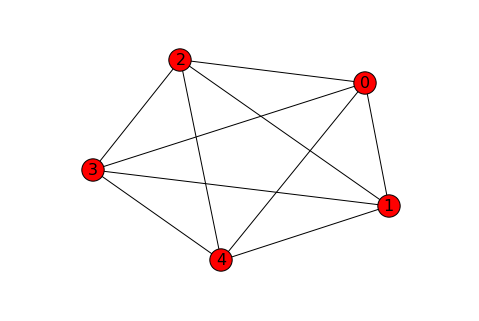

radius: 1
diameter: 1
center: [0, 1, 2, 3, 4]
periphery: [0, 1, 2, 3, 4]
clustering coefficients:
   coef
0     1
1     1
2     1
3     1
4     1
average clustering coefficients: 1.0


In [6]:
complete=nx.complete_graph(5)
nx.draw(complete, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(complete)

[분석]: complete_graph(n, create_using=None)  
Complete 그래프는 n개의 노드가 모두 서로 연결되어 있는 그래프입니다.  
따라서 한 노드에서 (n-1)개의 다른 노드들로 가는 거리가 모두 1입니다.  
그러므로 radius, diameter는 모두 1이고, 모든 노드가 center와 periphery에 속합니다.  
또한, 한 노드의 이웃 노드끼리도 모두 연결되어 있으므로 clutering coefficient가 모두 1입니다.

- Complete bipartite graph

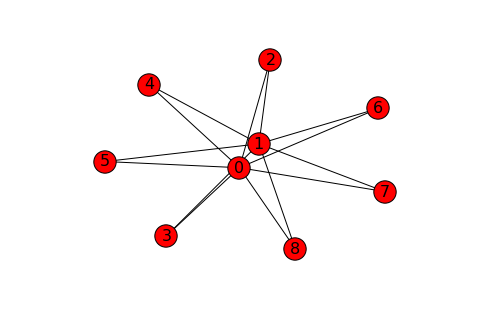

radius: 2
diameter: 2
center: [0, 1, 2, 3, 4, 5, 6, 7, 8]
periphery: [0, 1, 2, 3, 4, 5, 6, 7, 8]
clustering coefficients:
   coef
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
average clustering coefficients: 0.0


In [7]:
bipartite=nx.complete_bipartite_graph(2,7)
nx.draw(bipartite, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(bipartite)

[분석]: complete_bipartite_graph(n1, n2[, create_using])  
Complete bipartite 그래프는 이름에서도 알 수 있듯이 노드가 두 파트로 나누어져 있습니다.  
한 파트는 n1(현재 그래프에서 2)개의 노드를 가지고, 다른 파트는 n2(현재 그래프에서 7)개의 노드를 가집니다.  
파트의 내부에 있는 노드끼리는 서로 연결될 수 없고, 한 파트의 노드에서 다른 파트의 노드로의 연결만 가능합니다.  
이 그래프는 complete 그래프이므로 한 파트의 노드가 다른 파트의 모든 노드들과 연결되어 있습니다.  
이 그래프에서 한 노드가  다른 파트의 노드 하나를 지나면 같은 파트에 속해있는 모든 다른 노드로 갈 수 있으므로, radius와 diameter는 2이고, 모든 노드들이 center와 periphery에 속해있습니다.  
또한 한 파트의 이웃 노드인 다른 파트의 노드들은 서로 연결되어있지 않습니다. 그러므로 clustering coefficient는 모두 0입니다.

- Circular ladder graph

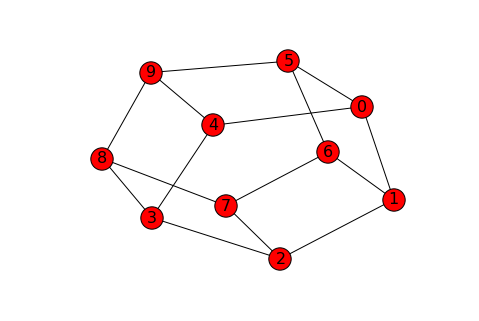

radius: 3
diameter: 3
center: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
periphery: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
clustering coefficients:
   coef
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
average clustering coefficients: 0.0


In [8]:
circular = nx.circular_ladder_graph(5)
nx.draw(circular, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(circular)

[분석]: circular_ladder_graph(n, create_using=None)  
Circular ladder 그래프는 n(현재 그래프에서 5)개의 노드가 원형으로 연결된 두 그래프가 꼭짓점끼리 연결된 그래프입니다.  
한 노드에서 다른 노드로 가는 최대 거리가 3(n/2 + 1, 소수점 아래 무시)을 갖고, 모든 노드에서 동일합니다.  
따라서 radius, diameter는 3이고 모든 노드가 center, periphery에 속합니다.  
이웃 노드끼리 연결되어 있지 않으므로, clustering coefficient는 모든 노드에서 0입니다.

- Random graph
---------

- Random graph using Barabási-Albert preferential attachment model.

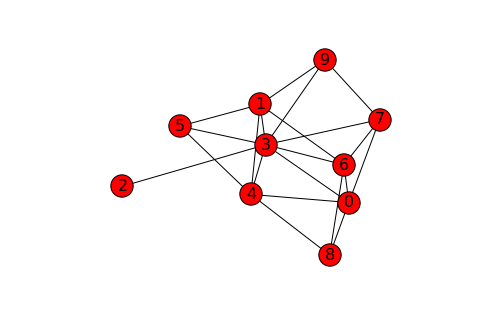

radius: 2
diameter: 3
center: [0, 1, 3, 4, 5, 6, 7]
periphery: [2, 8, 9]
clustering coefficients:
       coef
0  0.600000
1  0.500000
2  0.000000
3  0.357143
4  0.500000
5  1.000000
6  0.500000
7  0.666667
8  0.666667
9  0.666667
average clustering coefficients: 0.545714285714


In [9]:
barabasi = nx.barabasi_albert_graph(10,3)
nx.draw(barabasi, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(barabasi)

[분석]: barabasi_albert_graph(n, m, seed=None)  
Barabasi Albert 그래프는 n(현재 그래프에서 10)개의 노드를 생성합니다. 노드들은 m(현재 그래프에서 3)개의 간선(edge)를 생성된 노드로 연결합니다. 이때 간선은 가장 인기있는 노드에게 붙을 확률이 높습니다. 이 그래프를 통해서 사회망에 근접한 네트워크를 만들어 낼 수 있습니다.  
현재 그래프에서 가장 짧은 최대 거리(radius)는 2이고, radius를 갖는 노드들(center)는 노드 0, 1, 3, 4, 5, 6, 7입니다. 이를 통해 그래프의 노드들이 대체적으로 가까운 편임을 추측할 수 있습니다.
가장 긴 최대 거리(diameter)는 3이고, diameter를 갖는 노드들(periphery)는 노드 2, 8, 9입니다.  
노드 5가 가장 높은 clustering coefficient인 1 값을 갖고 있습니다. 이는 노드 5의 이웃들이 모두 연결되어 있다는 것을 의미합니다. 노드 5의 이웃 노드는 노드 1, 3, 4이고 clustering coefficient는 각각 0.5, 0.357, 0.5입니다.  
노드 2는 가장 낮은 clustering coefficient인 0 값을 갖고 있습니다. 노드 2의 이웃 노드는 노드 3 하나입니다.  

- A Watts-Strogatz small-world graph.

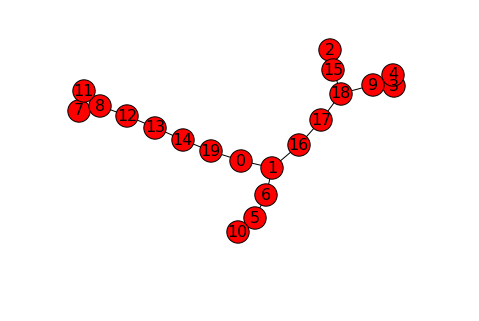

radius: 6
diameter: 12
center: [0]
periphery: [2, 3, 4, 7, 11]
clustering coefficients:
        coef
0   0.000000
1   0.000000
2   0.000000
3   1.000000
4   1.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.333333
10  0.000000
11  0.000000
12  0.000000
13  0.000000
14  0.000000
15  0.000000
16  0.000000
17  0.000000
18  0.000000
19  0.000000
average clustering coefficients: 0.116666666667


In [48]:
wattstrigatz = nx.watts_strogatz_graph(20,2,0.5)
nx.draw(wattstrigatz, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(wattstrigatz)

[분석]: watts_strogatz_graph(n, k, p, seed=None)  
Watts-Strogatz small-world 그래프는 n(현재 그래프에서 20)개의 노드를 링 형태로 생성합니다. 그 다음 각 노드는 링 안에서 가장 가까운 k(현재 그래프에서 2)개의 노드와 연결합니다. 이때 노드a와 노드b의 연결을 p(현재 그래프에서 0.5)의 확률로 노드a와 노드c의 연결로 바꿉니다.  
현재 그래프에서 radius는 6이고, 이 radius를 갖는 노드(center)는 노드 0입니다.  
diameter는 12, 이 diameter를 갖는 노드(periphery)는 노드 2, 3, 4, 7, 11입니다.
노드 3, 4는 clusterting coefficient이 1이고, 노드  9의 clustering coefficient은 0.33, 나머지 노드의 clustering coefficient는 모두 0입니다.
Average clustering coefficient는 0.11667입니다.

- A random regular graph

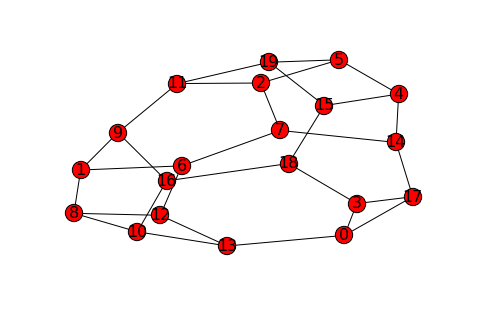

radius: 4
diameter: 5
center: [1, 2, 3, 6, 7, 9, 14, 16, 17, 18]
periphery: [0, 4, 5, 8, 10, 11, 12, 13, 15, 19]
clustering coefficients:
        coef
0   0.333333
1   0.000000
2   0.000000
3   0.333333
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.000000
10  0.000000
11  0.000000
12  0.000000
13  0.000000
14  0.000000
15  0.000000
16  0.000000
17  0.333333
18  0.000000
19  0.000000
average clustering coefficients: 0.05


In [55]:
random = nx.random_regular_graph(3,20)
nx.draw(random, node_size=300, with_labels=True, font_size=16)
plt.show()

graph_features(random)

[분석]: random_regular_graph(d, n, seed=None)  
Random regular 그래프는 degree가 d(현재 그래프에서 3)인 n(현재 그래프에서 20)개의 노드를 생성합니다.  
그래프에서 radius는 4이고 이러한 값을 갖는 노드(center)는 노드[1, 2, 3, 6, 7, 9, 14, 16, 17, 18]입니다.  
diameter는 5이고, periphery는 [0, 4, 5, 8, 10, 11, 12, 13, 15, 19]입니다.  
clustering coefficients는 최대가 0.33이고 최소가 0입니다. 평균 clustering coefficient도 0.05입니다.  
랜덤으로 생성된 regular 그래프의 한 노드의 이웃끼리 연결되어 있을 확률이 거의 없음을 추측할 수 있습니다.

- Holme and Kim algorithm for growing graphs with powerlaw

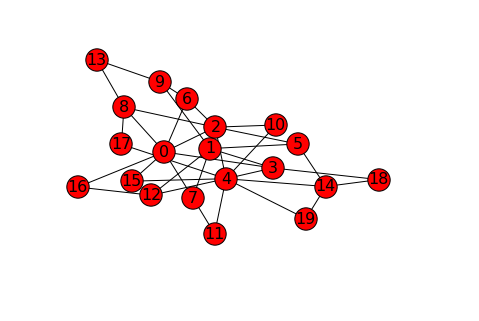

radius: 3
diameter: 4
center: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 16, 17]
periphery: [9, 11, 13, 14, 18, 19]
clustering coefficients:
        coef
0   0.095238
1   0.066667
2   0.190476
3   0.000000
4   0.055556
5   0.333333
6   0.333333
7   0.000000
8   0.166667
9   0.000000
10  1.000000
11  0.000000
12  0.000000
13  0.000000
14  0.166667
15  0.000000
16  0.000000
17  0.000000
18  0.000000
19  1.000000
average clustering coefficients: 0.170396825397


In [53]:
powerlaw = nx.powerlaw_cluster_graph(20,2,0)
nx.draw(powerlaw, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(powerlaw)

[분석]: powerlaw_cluster_graph(n, m, p, seed=None)  
Powerlaw cluster 그래프의 함수의 입력으로는 n개의 노드와, m개의 랜덤한 간선, 랜덤한 m개의 에지를 생성하고 triangle을 추가할 확률 p가 있습니다. triangle은 노드의 이웃간의 간선을 의미하는 것 같습니다.  
현재 그래프에서는 20개의 노드와 한 노드에 2개의 랜덤한 간선, 그리고 이웃간 간선이 생길 확률을 0으로 두고 그래프를 생성했습니다.  
그래프의 가장 짧은 최대 거리(radius)는 3이고, 노드[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 16, 17]가 center에 속합니다.  
그래프의 가장 긴 최대 거리(diameter)는 4이고, 노드[9, 11, 13, 14, 18, 19]가 periphery에 속합니다.  
가장 높은 clustering coefficient를 갖는 노드는 노드 10과 노드 19이고 값은 1입니다.  
그 다음으로 높은 clustering coefficient는 0.33입니다. Average clustering coefficient는 0.17입니다.  
20개의 노드를 갖는 그래프의 diameter가 4이고, Average clustering coefficient는 0.17으로 보아 각 노드는 서로 가깝지만 노드의 이웃끼리 간선으로 연결되어 있는 경우는 적을 것으로 추측할 수 있습니다.

- A random shell graph for the constructor given.

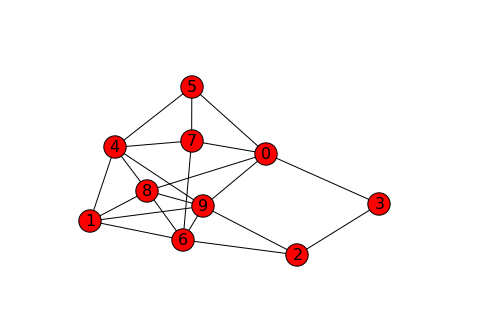

radius: 2
diameter: 3
center: [0, 6, 7, 8, 9]
periphery: [1, 2, 3, 4, 5]
clustering coefficients:
       coef
0  0.200000
1  0.833333
2  0.333333
3  0.000000
4  0.400000
5  0.666667
6  0.400000
7  0.333333
8  0.600000
9  0.466667
average clustering coefficients: 0.423333333333


In [13]:
binomial = nx.binomial_graph(10,0.5)
nx.draw(binomial, node_size=500, with_labels=True, font_size=16)
plt.show()

graph_features(binomial)

[분석]: binomial_graph(n, p, seed=None, directed=False)  
binomial_graph는 랜덤 그래프(Erdős-Rényi graph, binomial graph)를 그립니다.  
n(현재 그래프에서 10)개의 노드를 생성하고, 노드에 에지를 생성할 확률은 p(현재 그래프에서 0.5)입니다.  
그래프의 가장 짧은 최대 거리를 갖는 노드는 노드[0, 6, 7, 8, 9]이고, 값은 2입니다.  
가장 긴 최대 거리를 갖는 노드는 노드[1, 2, 3, 4, 5]이고, 값은 3입니다.
Clustering coefficients는 0.8이 최대이고 0이 최소입니다. Average clustering coefficient는 0.423입니다.
노드간 최대 거리가 3이므로 노드 사이의 거리는 짧은 편이고, average clustering coefficient가 0.423이므로 노드의 이웃끼리도 어느정도 연결되어 있는 그래프라고 추측할 수 있습니다.

2. Twitter 소셜 그래프 특성 분석
-------

In [14]:
import os
import glob

mainpath = os.path.dirname(os.path.realpath('__file__'))

def load_files_bytype(file_type):
    files = glob.glob("%s/twitter/*.%s" % (mainpath, file_type))
    return files

In [15]:
circles_file = load_files_bytype(file_type='.circles')
edges_file = load_files_bytype(file_type='.edges')
egofeat_file = load_files_bytype(file_type='.egofeat')
feat_file = load_files_bytype(file_type='.feat')
featnames_file = load_files_bytype(file_type='.featnames')

In [16]:
network = nx.DiGraph()

def load_edges():
    edge_file = open("%s/twitter_combined.txt" % (mainpath),"r")
    for line in edge_file:
        # nodefrom nodeto
        split = [int(x) for x in line.split(" ")]
        node_from = split[0]
        node_to = split[1]
        network.add_edge(node_from, node_to)

load_edges()

MemoryError: 

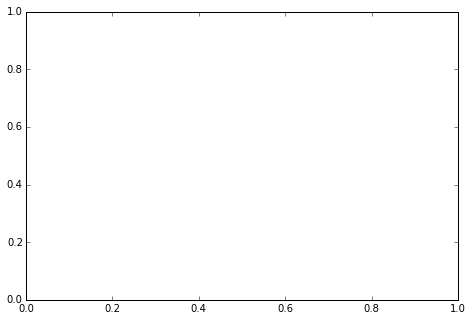

In [17]:
# 원본 파일은 시간이 너무 오래 걸려서 중단하고, 내용을 조금 잘라내서 그린 그래프를 밑에서 그렸습니다.
nx.draw(network, node_size=10, with_labels=False, font_size=16)

In [21]:
print
print "총 노드의 수: ", network.number_of_nodes()
print "총 간선의 수: ", network.number_of_edges()


총 노드의 수:  81306
총 간선의 수:  1768149


In [37]:
undi_network = network.to_undirected()
print "average clustering coefficients:", nx.average_clustering(undi_network)
print "radius:", algo.radius(network)
print "diameter:", algo.diameter(network)

 average clustering coefficients: 0.565311468612
radius:

NetworkXError: Graph not connected: infinite path length

In [30]:
largest_wcc = max(nx.weakly_connected_component_subgraphs(network), key=len)
print "최대 WCC"
print "총 노드의 수: ", len(largest_wcc.nodes())
print "총 간선의 수: ", len(largest_wcc.edges())

최대 WCC
총 노드의 수:  81306
총 간선의 수:  1768149


[분석]: Weakly connected component가 그래프의 총 노드의 수와 같다는 점으로 보아 트위터 그래프에서 한 노드는 어떠한 방향으로든 다른 노드와 연결되어있다는 것을 알 수 있습니다.

In [22]:
largest_scc = max(nx.strongly_connected_component_subgraphs(network), key=len)
print "최대 SCC"
print "총 노드의 수: ", len(largest_scc.nodes())
print "총 간선의 수: ", len(largest_scc.edges())

최대 SCC
총 노드의 수:  68413
총 간선의 수:  1685163


[분석]: Strongly conntected component는 그래프의 총 노드의 수보다는 적지만 2/3이상의 노드가 속해있습니다. 이를 통해 트위터 그래프의 68413개의 노드 중 한 노드는 어떻게든 68413개의 다른 노드로 갈 수 있다는 것으로 알 수 있습니다. 

In [23]:
degree_centrality = nx.degree_centrality(network)

df = pd.DataFrame(degree_centrality.values(), index=degree_centrality.keys(), columns=['degree'])
df2 = df.sort('degree',ascending=False)
df2.head(10)

C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,degree
813286,0.046221
115485051,0.041621
40981798,0.041018
3359851,0.037673
43003845,0.034930
22462180,0.031179
34428380,0.030908
59804598,0.029592
7861312,0.028264
15913,0.026308


[분석]: 가장 높은 degree centrality가 0.046인 것으로 보아 트위터 그래프에서 다른 노드에 비해서 이웃 노드가 특출나게 많은 노드는 없을 것이라고 생각해 볼 수 있습니다. 

In [24]:
closeness_centrality = nx.closeness_centrality(network)

df = pd.DataFrame(closeness_centrality.values(), index=closeness_centrality.keys(), columns=['closeness'])
df2 = df.sort('closeness',ascending=False)
df2.head(10)

C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,closeness
3359851,0.322763
18581803,0.310355
15846407,0.309276
59804598,0.309240
813286,0.309236
5442012,0.301420
14691709,0.300932
7860742,0.300714
17093617,0.298940
7872262,0.298868


[분석]: 가장 높은 closeness centrality는 0.322이고 상위 10개의 노드들의 centrality가 0.02정도의 차이를 갖습니다. 상위 10개 노드들의 이웃 노드들과의 거리는 비슷할 것이라고 생각해 볼 수 있습니다. 

In [26]:
bet_centrality = nx.betweenness_centrality(network)

df = pd.DataFrame(bet_centrality.values(), index=bet_centrality.keys(), columns=['betweenness'])
df2 = df.sort('betweenness',ascending=False)
df2.head(10)

KeyboardInterrupt: 

In [36]:
eigenvector_centrality = nx.eigenvector_centrality(network)

df = pd.DataFrame(eigenvector_centrality.values(), index=eigenvector_centrality.keys(), columns=['eigenvector'])
df2 = df.sort('eigenvector',ascending=False)
df2.head(10)

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

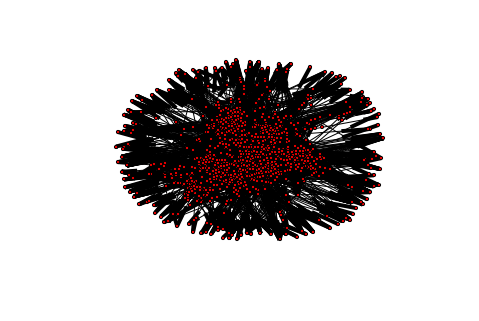

In [29]:
# 잘라낸 파일의 그래프
network2 = nx.DiGraph()

edge_file = open("%s/twitter_combined1.txt" % (mainpath),"r")
for line in edge_file:
    # nodefrom nodeto
    split = [int(x) for x in line.split(" ")]
    node_from = split[0]
    node_to = split[1]
    network2.add_edge(node_from, node_to)

nx.draw(network2, node_size=10, with_labels=False, font_size=16)

In [31]:
print
print "총 노드의 수: ", network2.number_of_nodes()
print "총 간선의 수: ", network2.number_of_edges()


총 노드의 수:  1831
총 간선의 수:  32107


In [33]:
largest_wcc = max(nx.weakly_connected_component_subgraphs(network2), key=len)
print "최대 WCC"
print "총 노드의 수: ", len(largest_wcc.nodes())
print "총 간선의 수: ", len(largest_wcc.edges())

최대 WCC
총 노드의 수:  1357
총 간선의 수:  21045


In [34]:
largest_scc = max(nx.strongly_connected_component_subgraphs(network2), key=len)
print "최대 SCC"
print "총 노드의 수: ", len(largest_scc.nodes())
print "총 간선의 수: ", len(largest_scc.edges())

최대 SCC
총 노드의 수:  982
총 간선의 수:  18069


In [57]:
undi_network = network2.to_undirected()
print "average clustering coefficients:", nx.average_clustering(undi_network)
print "radius:", algo.radius(network2)
print "diameter:", algo.diameter(network2)

average clustering coefficients: 0.503923543895
radius:

NetworkXError: Graph not connected: infinite path length

# 결론
-------

본 과제에서는 다양한 네트워크를 분석해보고, 트위터 네트워크를 만들어 수업시간에 배웠던 특징들을 나타내는 것을 해보았습니다. 이 과제를 통해서 서로 다른 네트워크를 비교하고 이름이 붙여진 특이한 네트워크를 만들어 보면서 네트워크를 분석하는 관점을 넓힐 수 있었습니다. 클래식 그래프의 경우는 그래프가 생성되는 규칙이 일정해서 그래프만 보고도 쉽게 분석할 수 있었지만, 랜덤 그래프의 경우는 확률적으로 생성되는 그래프이고 사용되는 알고리즘도 다양해서 분석이 어려웠습니다. 하지만 그래프를 생성하고 특징을 보면서 수업시간에서 배웠던 개념들에 익숙해질 수 있었습니다. 트위터 네트워크에서는 사실 많은 것을 찾아내지는 못했습니다. 실행 시간이 너무 오래걸려서 계산하지 못한 부분도 많고, degree와 closeness centrality는 상위 10개의 노드를 찾을 수 있었지만 값이 생각보다 작아서 중요한 의미를 알 수는 없었습니다. 그리고 networkx에서 directed graph에 대한 average clustering coefficient를 계산하는 것을 지원해주지 않아서 directed graph를 undirected graph로 변환하여 계산하였습니다. radius와 diameter의 경우 undirected graph로 구하면 의미가 없을 것 같아서 directed graph로 구했는데 에러가 나면서 값이 나오지 않았습니다.
주목할만한 점이라면 본래의 그래프의 average clustering coefficient와 값을 잘라낸 그래프의 average clustering coefficient가 각각 0.56, 0.50로 비슷하다는 점이었습니다.  

데이터 과학을 수강하면서 파이썬이라는 새로운 언어를 배우고, 데이터를 어떻게 분석할 것인가에 대해서 좀더 전문적인 시각을 갖게 되었습니다. 처음 배우는 언어로 데이터를 분석하는 것이 어려울 때가 많았지만 최대한 수업 내용을 따라가기 위해서 노력했습니다. 한 학기동안 열심히 강의해주셔서 감사합니다!